# Employee Exit Survey

## The Client
TAFE and DETE are vocational colleges in Australia. They have been doing exit surveys for a while and have now gathered a dataset of about 1600 results which they would like analysed. The client is focussed on internal contributing factors.

## Aims of Analysis: Dissatisfaction
The client has asked for a report to help them understand the results of their recent exit survey.

They wish to understand the profile of employees who cite dissatisfaction as a contributing factor to their exit from the organisation.

Leadership wants to understand where to target retention improvement strategies.

## Conclusions: Age and Dissatisfaction
There is a significant increase in dissatisfaction amongst older employees of both TAFE and DETE compared to young employees.

Management should target retention improvement strategies at older employees.

## Notebooks and Reports
The following notebooks and documents are part of this anaylsis:

### Jupyter Notebook Filename: Summary
- [employee_exit_survey_cleaning_1.ibynb](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_cleaning_1.ipynb): Columns drops, missing data, renaming columns, tidying data for consistency
- [employee_exit_survey_cleaning_2.ibynb](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_cleaning_2.ipynb): Adding calculated columns, adding category columns, further drops
- [employee_exit_survey_correlation.ibynb](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_correlation.ipynb): Investigating correlations to guide analysis
- [employee_exit_survey_gender.ibynb](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_gender.ipynb): Aggregation by pivot_table of gender subsets, visualisations
- [employee_exit_survey_age.ibynb](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_age.ipynb): Aggregation by pivot_table of age subsets, visualisations
- [employee_exit_survey_conflict.ibynb](https://github.com/jholidayscott/employee_exit_survey/blob/main/employee_exit_survey_conflict.ipynb): Exploration of conflict as a contributory factor

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np

In [2]:
survey = pd.read_csv('employee_exit_survey_clean_final.csv')

In [3]:
survey.head()

,Unnamed: 0,index,cf_to_private_sector,cf_health,cf_family,cf_dept_dissatisfaction,cf_job_dissatisfaction,cf_interpersonal_conflict,cf_other,institute_recognition,institute_job_security,dept_workload,dept_work_life_balance,dept_work_environment,gender,age,service_years,exit_year,college,cf_dept_or_job_dissatisfaction
0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,Female,26–30,1 to 2 Years,2010,TAFE,False
1,1,1,False,False,False,False,False,False,False,True,True,True,False,True,Female,NaN,NaN,2010,TAFE,False
2,2,2,False,False,False,False,False,False,False,False,False,False,False,False,Female,NaN,NaN,2010,TAFE,False
3,3,3,False,False,False,False,False,False,False,False,False,True,True,True,Female,NaN,NaN,2010,TAFE,False
4,4,4,True,False,False,False,False,False,False,True,False,True,True,True,Male,41–45,3 to 4 Years,2010,TAFE,False


# Exploratory Charts
From the initial exploration of correlations, there is a clear tendency for older employees to be more dissatisfied than younger ones.

It would be beneficial to explore:
- Measure the scale of increase in dissatisfaction as age increases
- Link to length of service to see if this is a factor (note initial correlation analysis did not suggest length of servce was correlated directly to dissatisfaction)
- Compare TAFE to DETE because there were clear differences.

## Baseline Age Charts
These charts describe the age and dissatisfaction profiles of the two colleges.

<AxesSubplot:title={'center':'Dept and Job Dissatisfaction as a CF by Age'}, xlabel='age'>

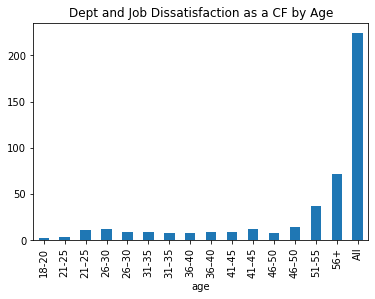

In [87]:
pv_age = survey.pivot_table(values='cf_dept_or_job_dissatisfaction', index='age', aggfunc=np.sum, margins=True)
pv_age.plot(kind='bar', xlim=((0,10)), title='Dept and Job Dissatisfaction as a CF by Age', legend=False)

Initially, there appears to be rise in dissatisfaction in older people, and perhaps a small increase in the 20-30 buckets.

To see if there is a tendency for these employees to cite dissatisfaction as their reason for leaving more than their peers, these values have to made proportionate to the age distribution.

<AxesSubplot:title={'center':'TAFE Age Distribution'}>

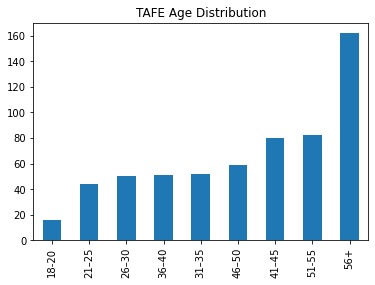

In [93]:
values = survey.loc[survey['college'] == 'TAFE','age']
values.value_counts().sort_values(ascending=True).plot(kind='bar', title='TAFE Age Distribution')

<AxesSubplot:title={'center':'DETE Age Distribution'}>

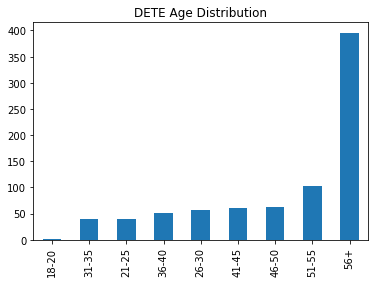

In [95]:
values = survey.loc[survey['college'] == 'DETE','age']
values.value_counts().sort_values(ascending=True).plot(kind='bar', title='DETE Age Distribution')

Both TAFE and DETE have many more employees aged 56+ than any other age group.

TAFE does not have a higher number of 20-30 year olds to correspond to the slight bulge in dissatisfaction we saw above.

Therefore, it is worth pressing on with a fulling proportional analysis.

  Age Group  Total in Group  Dissatisfied in Group
0       56+             162                     21
1     51-55              82                     14
2     41–45              80                     13
3     46–50              59                     12
4     31–35              52                     11
5     36–40              51                      9
6     26–30              50                      9
7     21–25              44                      8
8     18-20              16                      2
  Age Group  Total in Group  Dissatisfied in Group
0       56+             396                     51
1     51-55             103                     24
2     41–45              63                     12
3     46–50              61                      9
4     31–35              57                      9
5     36–40              51                      8
6     26–30              40                      8
7     21–25              39                      4


<AxesSubplot:>

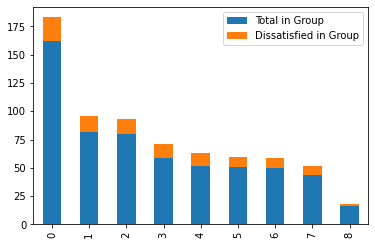

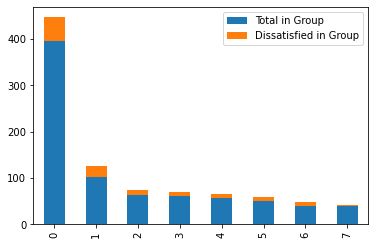

In [98]:
# List of the standardised age categories from the original dataset - both TAFE and DETE use the same.
x_buckets = survey.loc[survey['college'] == 'TAFE','age'].value_counts().index.tolist()

# List of the total number of people in each age category.
tafe_age_values = survey.loc[survey['college'] == 'TAFE','age'].value_counts()
dete_age_values = survey.loc[survey['college'] == 'DETE','age'].value_counts()

# Slice the colleges into their own datasets.
tafe_survey = survey[survey['college'] == 'TAFE']
dete_survey = survey[survey['college'] == 'DETE']

# Get a frequency table of how many dissatisfied employees there are in each age bucket.
tafe_diss_values = tafe_survey.loc[survey['cf_dept_or_job_dissatisfaction'] == True,'age'].value_counts()
dete_diss_values = dete_survey.loc[survey['cf_dept_or_job_dissatisfaction'] == True,'age'].value_counts()

# DataFrame of dissatisfaction frequency table and age group buckets because it's easier to plot.
tafe_frame = pd.DataFrame(list(zip(x_buckets,tafe_age_values,tafe_diss_values)), columns =['Age Group', 'Total in Group', 'Dissatisfied in Group'])
print(tafe_frame)

dete_frame = pd.DataFrame(list(zip(x_buckets,dete_age_values,dete_diss_values)), columns =['Age Group', 'Total in Group', 'Dissatisfied in Group'])
print(dete_frame)

# Plot the data to investigate.
tafe_frame.plot(kind='bar', stacked=True)
dete_frame.plot(kind='bar', stacked=True)

It's difficutly to see the effect, if any, that age has in the data. 

Percentages will make any effect visible.

In [99]:
#Create a new column of employees not citing dissatisfaction to use to create percentages.
tafe_frame['Satisfied or Other'] = tafe_frame['Total in Group'] - tafe_frame['Dissatisfied in Group']
print(tafe_frame)
dete_frame['Satisfied or Other'] = dete_frame['Total in Group'] - dete_frame['Dissatisfied in Group']
print(dete_frame)

  Age Group  Total in Group  Dissatisfied in Group  Satisfied or Other
0       56+             162                     21                 141
1     51-55              82                     14                  68
2     41–45              80                     13                  67
3     46–50              59                     12                  47
4     31–35              52                     11                  41
5     36–40              51                      9                  42
6     26–30              50                      9                  41
7     21–25              44                      8                  36
8     18-20              16                      2                  14
  Age Group  Total in Group  Dissatisfied in Group  Satisfied or Other
0       56+             396                     51                 345
1     51-55             103                     24                  79
2     41–45              63                     12                  51
3     

In [100]:
# Functions to apply to the Dataframe
def perc_tafe(col):
    div = col / tafe_frame['Total in Group']
    return div*100

def perc_dete(col):
    div = col / dete_frame['Total in Group']
    return div*100

# Identify the range for calculation
columns = ['Dissatisfied in Group','Satisfied or Other']

# Convert to percentages and create new DataFrame
tafe_frame_perc = tafe_frame[columns].apply(perc_tafe)
dete_frame_perc = dete_frame[columns].apply(perc_dete)

print(tafe_frame_perc)
print(dete_frame_perc)


   Dissatisfied in Group  Satisfied or Other
0              12.962963           87.037037
1              17.073171           82.926829
2              16.250000           83.750000
3              20.338983           79.661017
4              21.153846           78.846154
5              17.647059           82.352941
6              18.000000           82.000000
7              18.181818           81.818182
8              12.500000           87.500000
   Dissatisfied in Group  Satisfied or Other
0              12.878788           87.121212
1              23.300971           76.699029
2              19.047619           80.952381
3              14.754098           85.245902
4              15.789474           84.210526
5              15.686275           84.313725
6              20.000000           80.000000
7              10.256410           89.743590


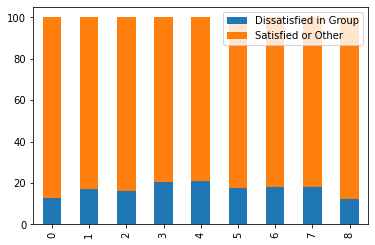

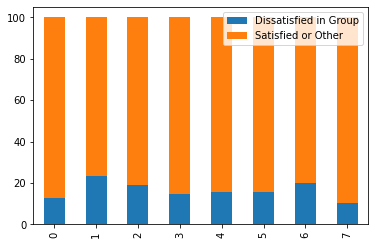

In [101]:
# Quick exploratory plot
tafe_frame_perc.plot(kind='bar', stacked=True)
plt.show()
dete_frame_perc.plot(kind='bar', stacked=True)
plt.show()

# Conclusions

There is no correlation between older employees and dissatisfaction. Older employees make a significant portion of the population which initially suggested that there may be a dissatisfaction problem in older employees. However, once adjusted to percentages in each age bucket, it is clear that there are no negative trends in that age group.

At TAFE, dissatisfaction is well distributed and there are no discernable patterns.

At DETE, there is perhaps a bulge at the yonger end in 21-25 year olds, but it is likely not significant.

Therefore, flag as a possible concern in the report but do not create visualisation.

